<a href="https://colab.research.google.com/github/Mohamedragih1/Fashion-MNIST/blob/main/fashion_mnist_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [ ]:
# Load and preprocess the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# Split the training data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# Flatten the images
X_train = X_train.reshape(-1, 28 * 28)
X_val = X_val.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

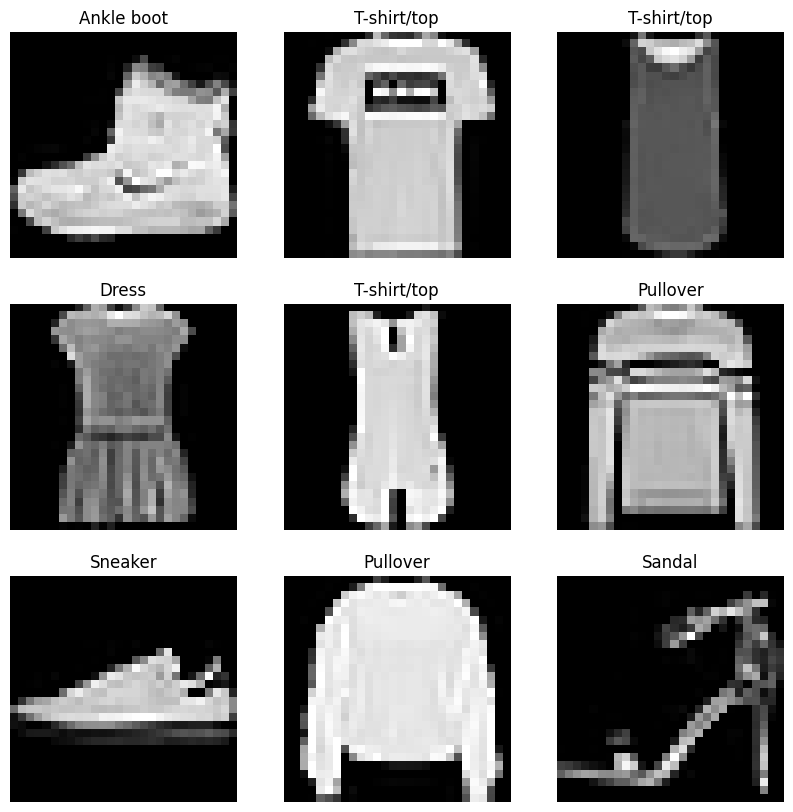

In [ ]:
# Visualize some images with labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_full[i], cmap="gray")
    plt.title(class_names[y_train_full[i]])
    plt.axis("off")
plt.show()



In [ ]:
# Create the model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(264, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate = 0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch > 50:
        return lr * 0.8
    return lr

lr_scheduler = LearningRateScheduler(scheduler)

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[lr_scheduler],
    batch_size=16
)


Epoch 1/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6553 - loss: 1.0348 - val_accuracy: 0.8333 - val_loss: 0.4822 - learning_rate: 0.0010
Epoch 2/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7859 - loss: 0.6402 - val_accuracy: 0.8502 - val_loss: 0.4291 - learning_rate: 0.0010
Epoch 3/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8043 - loss: 0.5792 - val_accuracy: 0.8363 - val_loss: 0.4592 - learning_rate: 0.0010
Epoch 4/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8196 - loss: 0.5346 - val_accuracy: 0.8370 - val_loss: 0.4341 - learning_rate: 0.0010
Epoch 5/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8287 - loss: 0.5037 - val_accuracy: 0.8572 - val_loss: 0.3879 - learning_rate: 0.0010
Epoch 6/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8289 - loss: 0.4973 - val_accuracy: 0.8657 - val_loss: 0.3815 - learning_rate: 0.0010
Epoch 7/100
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.3119
Test Accuracy: 0.8938000202178955


In [ ]:
# Generate predictions and classification report
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.82      0.82      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.81      0.83      0.82      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.72      0.73      0.73      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



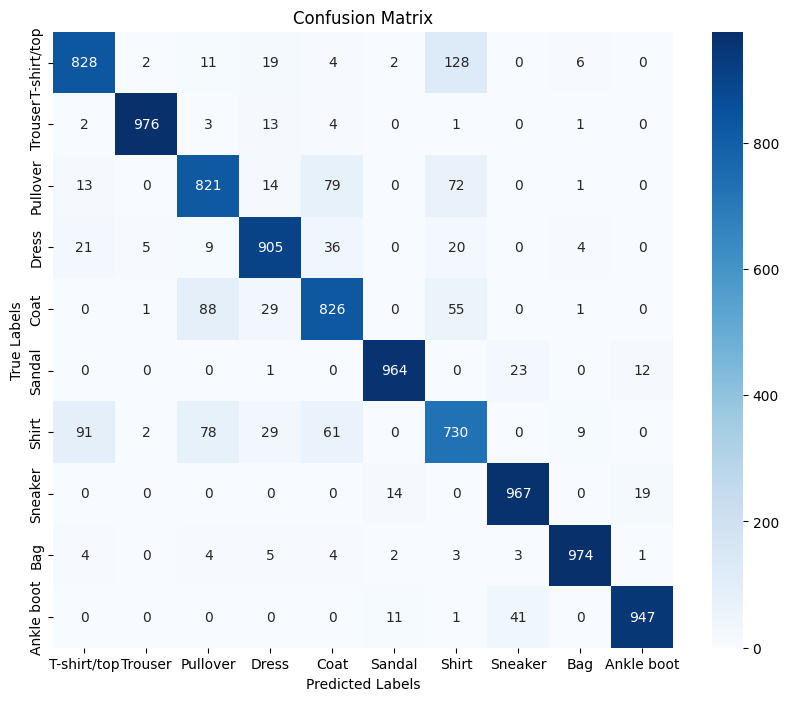

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

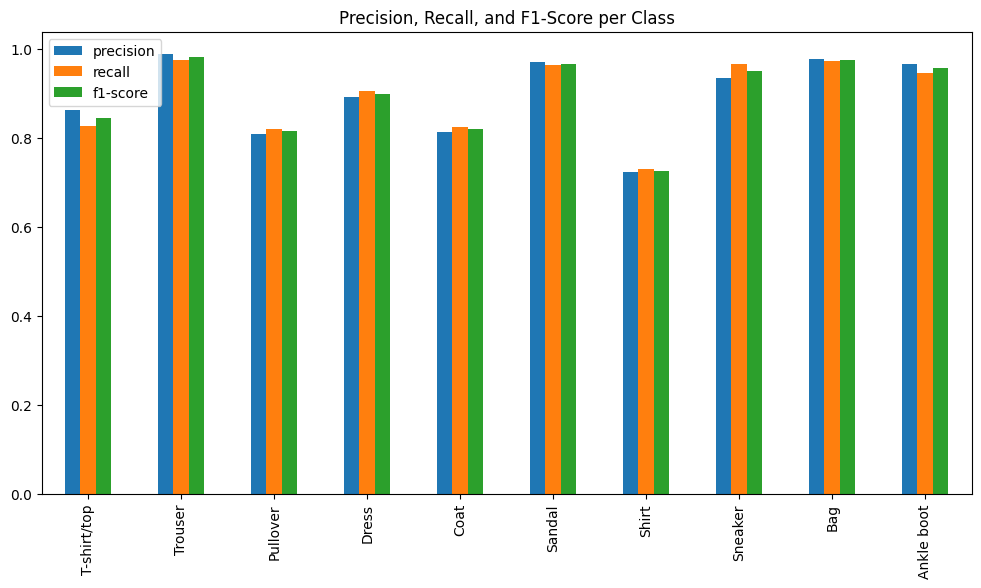

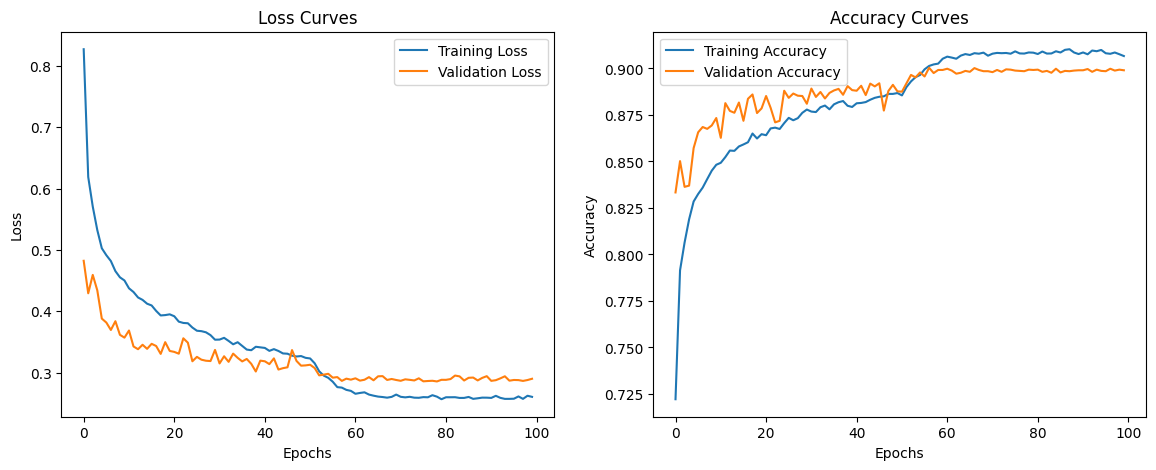

In [ ]:
# Plot classification metrics as bar graphs
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
metrics_df = pd.DataFrame(report).T[['precision', 'recall', 'f1-score']].iloc[:-3]

metrics_df.plot(kind='bar', figsize=(12, 6), title="Precision, Recall, and F1-Score per Class")
plt.show()

# Plot training history
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
